In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style('darkgrid')

from torch import nn
from torch.utils.data import DataLoader
from transformers import AutoModel, AlbertTokenizerFast

from data import SNLIBiEncoderBucketingDataset
from data.utils import get_data, collate_fn_buckets

from model import NLIBiEncoder

from training import Trainer

# Data

In [2]:
train, test, val = get_data('snli_1.0')

In [3]:
LABELS = ['entailment', 'contradiction', 'neutral']
NUM_LABELS = len(LABELS)

train = train[train.target.isin(set(LABELS))]
val = val[val.target.isin(set(LABELS))]
test = test[test.target.isin(set(LABELS))]

In [4]:
train.head()

,sentence1,sentence2,target
0,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.,neutral
1,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",contradiction
2,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",entailment
3,Children smiling and waving at camera,They are smiling at their parents,neutral
4,Children smiling and waving at camera,There are children present,entailment


In [5]:
target2idx = {l: i for i, l in enumerate(LABELS)}
train.target = train.target.map(target2idx)
val.target = val.target.map(target2idx)
test.target = test.target.map(target2idx)

In [6]:
albert_tokenizer = AlbertTokenizerFast.from_pretrained('albert-base-v2')

In [7]:
train_dataset = SNLIBiEncoderBucketingDataset(albert_tokenizer, train.sentence1, train.sentence2, train.target, batch_size=52)
val_dataset = SNLIBiEncoderBucketingDataset(albert_tokenizer, val.sentence1, val.sentence2, val.target, batch_size=52)

100%|██████████| 19648/19648 [00:02<00:00, 8297.81it/s] 


In [8]:
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True, collate_fn=collate_fn_buckets)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False, collate_fn=collate_fn_buckets)

# Model

In [9]:
albert = AutoModel.from_pretrained('albert-base-v2')

In [10]:
model = NLIBiEncoder(albert, NUM_LABELS, lambda x: x.pooler_output)

In [11]:
criterion = nn.CrossEntropyLoss()
trainer = Trainer(model, criterion, 'albert/v1/albert_snli.pt', 'albert/v1/albert_optimizer.pt', lr=1e-4, device='cuda:0')

# Training

In [12]:
trainer.train(train_loader, val_loader, num_epochs=20, frozen_encoder_epochs=1)

Epoch 1/20:


Mean loss: 1.031504927277565. Current progress: : 100%|██████████| 10565/10565 [15:58<00:00, 11.03it/s] 


Mean training loss: 1.0473068198207651. Mean validation loss: 1.0132114136660542.
Training accuracy: 0.43985896495421095. Validation accuracy: 0.4847312703583062.
Epoch 2/20:


Mean loss: 0.6438773564696312. Current progress: : 100%|██████████| 10565/10565 [37:57<00:00,  4.64it/s]


Mean training loss: 0.7122468795276512. Mean validation loss: 0.5950751446542286.
Training accuracy: 0.6984948131212833. Validation accuracy: 0.7551913680781759.
Epoch 3/20:


Mean loss: 0.5981659638285637. Current progress: : 100%|██████████| 10565/10565 [38:42<00:00,  4.55it/s]


Mean training loss: 0.6050596889787188. Mean validation loss: 0.5662690268622504.
Training accuracy: 0.7544082553193039. Validation accuracy: 0.7725977198697068.
Epoch 4/20:


Mean loss: 0.5430348038971424. Current progress: : 100%|██████████| 10565/10565 [37:34<00:00,  4.69it/s]


Mean training loss: 0.5552794902487158. Mean validation loss: 0.5401271464963439.
Training accuracy: 0.7795954252803682. Validation accuracy: 0.7875610749185668.
Epoch 5/20:


Mean loss: 0.5220235171020031. Current progress: : 100%|██████████| 10565/10565 [37:02<00:00,  4.75it/s]


Mean training loss: 0.5245630108387731. Mean validation loss: 0.5167575797075947.
Training accuracy: 0.7945180544153544. Validation accuracy: 0.7944828990228013.
Epoch 6/20:


Mean loss: 0.48951431211829183. Current progress: : 100%|██████████| 10565/10565 [37:05<00:00,  4.75it/s]


Mean training loss: 0.4948357394759372. Mean validation loss: 0.5021823843320211.
Training accuracy: 0.8075548767945654. Validation accuracy: 0.7996742671009772.
Epoch 7/20:


Mean loss: 0.46962412968277933. Current progress: : 100%|██████████| 10565/10565 [37:15<00:00,  4.73it/s]


Mean training loss: 0.4704883983278523. Mean validation loss: 0.494660308515584.
Training accuracy: 0.8185438877835763. Validation accuracy: 0.803542345276873.
Epoch 8/20:


Mean loss: 0.44482488828897476. Current progress: : 100%|██████████| 10565/10565 [37:13<00:00,  4.73it/s]


Mean training loss: 0.4416284143565054. Mean validation loss: 0.4880766804729189.
Training accuracy: 0.8317081295381775. Validation accuracy: 0.8096498371335505.
Epoch 9/20:


Mean loss: 0.410281886190176. Current progress: : 100%|██████████| 10565/10565 [37:02<00:00,  4.75it/s]  


Mean training loss: 0.40295191301210087. Mean validation loss: 0.4955056174091561.
Training accuracy: 0.8484564962948266. Validation accuracy: 0.8075122149837134.
Epoch 10/20:


Mean loss: 0.3914648809880018. Current progress: : 100%|██████████| 10565/10565 [37:08<00:00,  4.74it/s] 


Mean training loss: 0.37283830215693425. Mean validation loss: 0.5091925238175367.
Training accuracy: 0.8618045860053479. Validation accuracy: 0.8069014657980456.
Epoch 11/20:


Mean loss: 0.3536397117525339. Current progress: : 100%|██████████| 10565/10565 [37:08<00:00,  4.74it/s] 


Mean training loss: 0.34300110274709855. Mean validation loss: 0.5327161900580876.
Training accuracy: 0.8743735972491977. Validation accuracy: 0.8062907166123778.
Epoch 12/20:


Mean loss: 0.33108416706323623. Current progress: : 100%|██████████| 10565/10565 [37:26<00:00,  4.70it/s]


Mean training loss: 0.3184478147573314. Mean validation loss: 0.5408340940872828.
Training accuracy: 0.8843195896368001. Validation accuracy: 0.8075122149837134.
Epoch 13/20:


Mean loss: 0.31229907973855736. Current progress: : 100%|██████████| 10565/10565 [37:00<00:00,  4.76it/s]


Mean training loss: 0.2960786165305494. Mean validation loss: 0.574174604560963.
Training accuracy: 0.8934446371915313. Validation accuracy: 0.8032369706840391.
Validation performance has started degrading. Performing early stopping.


NLIBiEncoder(
  (encoder): AlbertModel(
    (embeddings): AlbertEmbeddings(
      (word_embeddings): Embedding(30000, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0, inplace=False)
    )
    (encoder): AlbertTransformer(
      (embedding_hidden_mapping_in): Linear(in_features=128, out_features=768, bias=True)
      (albert_layer_groups): ModuleList(
        (0): AlbertLayerGroup(
          (albert_layers): ModuleList(
            (0): AlbertLayer(
              (full_layer_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
              (attention): AlbertAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
      

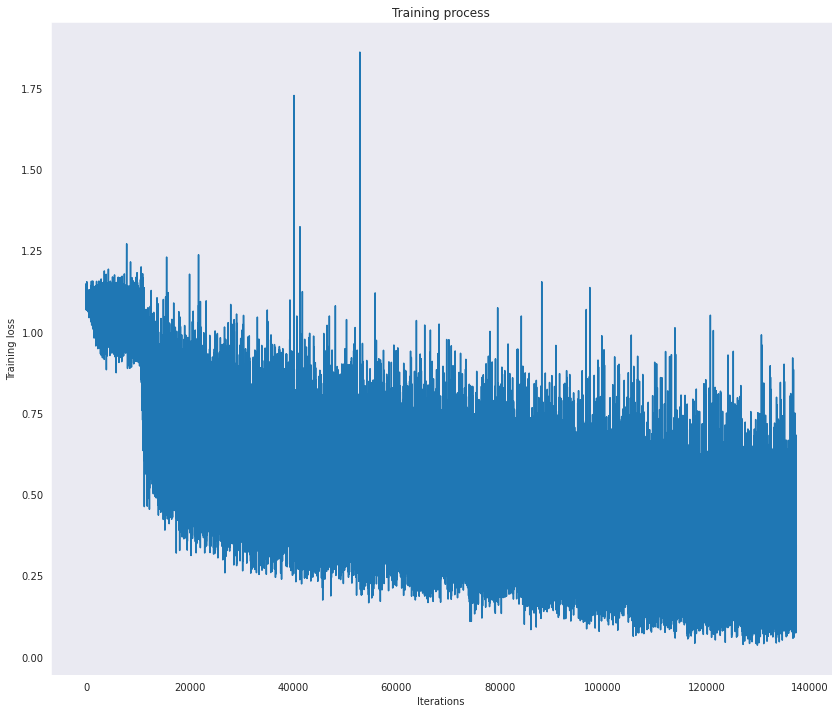

In [13]:
plt.figure(figsize=(14, 12))
plt.plot(trainer.train_losses)
plt.grid()
plt.title('Training process')
plt.xlabel('Iterations')
plt.ylabel('Training loss');